In [6]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

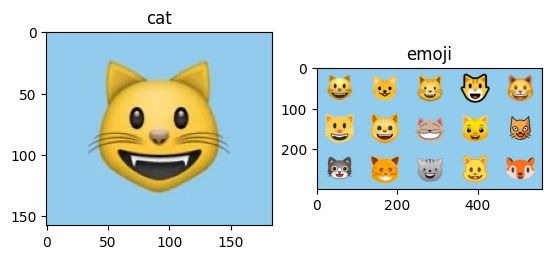

In [7]:
# panggil dan konversi warna agar sesuai dengan Matplotlib
cat = cv2.imread('cat1.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

# panggil dan konversi warna agar sesuai dengan Matplotlib
cat2 = cv2.imread('cat2.jpg')
cat2 = cv2.cvtColor(cat2, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(cat), plt.title('cat')
plt.subplot(122),plt.imshow(cat2), plt.title('emoji')
plt.show()

In [8]:
import numpy as np
import cv2

# Membaca gambar utuh untuk dicari
img_rgb = cv2.imread('cat2.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Membaca template
template = cv2.imread('cat1.jpg', 0)

# Ukuran template. Ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]

# Menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Nilai threshold atau ambang batas deteksi kemiripan titik.
# Lakukan eksperimen dengan merubah nilai ini
threshold = 0.15
loc = np.where(res >= threshold)

# Membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint = []
lspoint2 = []
count = 0  # Untuk menyimpan jumlah matching yang ditemukan
for pt in zip(*loc[::-1]):
    # Jika sudah ada, skip lokasi tersebut
    if pt[0] not in lspoint and pt[1] not in lspoint2:
        # Gambar persegi warna kuning dengan ketebalan dua poin
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
        for i in range(pt[0] - 9, pt[0] + 9, 1):
            # Tambahkan koordinat x ke list
            lspoint.append(i)
        for k in range(pt[1] - 9, pt[1] + 9, 1):
            # Tambahkan koordinat y ke list
            lspoint2.append(k)
        count += 1  # Jumlah matching yang ditemukan
    else:
        continue
print("Jumlah objek ditemukan:", count)

# Tampilkan dengan imshow
cv2.imshow("Deteksi Objek", img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()


Jumlah objek ditemukan: 4
